<a href="https://colab.research.google.com/github/ItsBaiShiXi/MachineLearning_SongPopularity/blob/main/MachineLearning_SongPopularity_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and Data Collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ItsBaiShiXi/MachineLearning_SongPopularity/main/top_10000_1960-now.csv")
display(df.shape)
display(df.head())
display(df.info())

(9999, 35)

Track URI  \
0  spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1  spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2  spotify:track:70XtWbcVZcpaOddJftMcVi   
3  spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4  spotify:track:72WZtWs6V7uu3aMgMmEkYe   

                                Track Name  \
0  Justified & Ancient - Stand by the Jams   
1          I Know You Want Me (Calle Ocho)   
2       From the Bottom of My Broken Heart   
3         Apeman - 2014 Remastered Version   
4       You Can't Always Get What You Want   

                           Artist URI(s)      Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH             The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg             Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4      Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E           The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe  The Rolling Stones   

                              Album URI  \
0  spotify:album:4MC0ZjNtVP1nDD5lsLxFjc   
1  spotify:album:5xLAcbvbSAlRtPXnKkggXA   
2  spotify:album:3WNxdumkSMGMJRhEgK80qx   
3  spotify:album:6lL6HugNEN4Vlc8sj0Zcse   
4  spotify:album:0c78nsgqX6VfniSNWIxwoD   

                                          Album Name  \
0                                   Songs Collection   
1                     Pitbull Starring In Rebelution   
2     ...Baby One More Time (Digital Deluxe Version)   
3  Lola vs. Powerman and the Moneygoround, Pt. On...   
4                                       Let It Bleed   

                     Album Artist URI(s) Album Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH              The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg              Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4       Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E            The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe   The Rolling Stones   

  Album Release Date                                    Album Image URL  ...  \
0         1992-08-03  https://i.scdn.co/image/ab67616d0000b27355346b...  ...   
1         2009-10-23  https://i.scdn.co/image/ab67616d0000b27326d73a...  ...   
2         1999-01-12  https://i.scdn.co/image/ab67616d0000b2738e4986...  ...   
3         2014-10-20  https://i.scdn.co/image/ab67616d0000b2731e7c53...  ...   
4         1969-12-05  https://i.scdn.co/image/ab67616d0000b27373d927...  ...   

   Speechiness  Acousticness  Instrumentalness Liveness  Valence    Tempo  \
0       0.0480        0.0158          0.112000   0.4080    0.504  111.458   
1       0.1490        0.0142          0.000021   0.2370    0.800  127.045   
2       0.0305        0.5600          0.000001   0.3380    0.706   74.981   
3       0.2590        0.5680          0.000051   0.0384    0.833   75.311   
4       0.0687        0.6750          0.000073   0.2890    0.497   85.818   

  Time Signature Album Genres                                Label  \
0            4.0          NaN                  Jams Communications   
1            4.0          NaN  Mr.305/Polo Grounds Music/J Records   
2            4.0          NaN                                 Jive   
3            4.0          NaN                    Sanctuary Records   
4            4.0          NaN                Universal Music Group   

                                          Copyrights  
0  C 1992 Copyright Control, P 1992 Jams Communic...  
1  P (P) 2009 RCA/JIVE Label Group, a unit of Son...  
2                     P (P) 1999 Zomba Recording LLC  
3  C © 2014 Sanctuary Records Group Ltd., a BMG C...  
4  C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...  

[5 rows x 35 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

None

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/ColabNotebooks/kaggle.json ~/.kaggle/kaggle.json
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets download joebeachcapital/top-10000-spotify-songs-1960-now
# !unzip -q /content/top-10000-spotify-songs-1960-now.zip -d /content/dataset_directory

#Data Exploration & Data Preprocessing

In [ ]:
# Proportion of missing data (Only displays column with at least 1 missing data)
missing_proportion = df.isnull().sum() / len(df)
missing_proportion = missing_proportion[missing_proportion > 0]
missing_df = missing_proportion.reset_index()
missing_df.columns = ['Column', 'Missing Proportion']
display(missing_df.sort_values("Missing Proportion", ascending=False))

Column  Missing Proportion
24          Album Genres            1.000000
9      Track Preview URL            0.289729
11         Artist Genres            0.055006
26            Copyrights            0.002400
25                 Label            0.000600
8        Album Image URL            0.000400
10                  ISRC            0.000300
16                  Mode            0.000200
23        Time Signature            0.000200
22                 Tempo            0.000200
21               Valence            0.000200
20              Liveness            0.000200
19      Instrumentalness            0.000200
18          Acousticness            0.000200
17           Speechiness            0.000200
13                Energy            0.000200
15              Loudness            0.000200
14                   Key            0.000200
1          Artist URI(s)            0.000200
12          Danceability            0.000200
7     Album Release Date            0.000200
6   Album Artist Name(s)            0.000200
5    Album Artist URI(s)            0.000200
3              Album URI            0.000200
4             Album Name            0.000100
2         Artist Name(s)            0.000100
0             Track Name            0.000100

We observe that `Album Genres` has all values missing, and about 29% of the data is missing in `Track Preview URL`. For the remaining data, all have less than 6% of values missing, so we can simply remove the NaNs.

In [ ]:
columns_to_check = [col for col in missing_df['Column'] if col not in ['Track Preview URL', 'Album Genres']]
# Drop columns with high proportion of missing data, and drop na for the remaining columns
df_droppedna = df.dropna(subset=columns_to_check).drop(['Track Preview URL', "Album Genres"], axis=1)
display(df_droppedna.shape)
missing_data_droppedna = df_droppedna.isnull().sum()
missing_data_droppedna = missing_data_droppedna[missing_data_droppedna > 0]
print(f"Missing data = {missing_data_droppedna}")

(9429, 33)

Missing data = Series([], dtype: int64)


We make sure there is no missing data, now we can move on to see the distribution of categorical columns(dtype="object")

In [ ]:
# Filter columns with dtype 'object'
categorical_columns = df_droppedna.select_dtypes(include=['object']).columns
unique_counts = df_droppedna[categorical_columns].nunique()
unique_df = unique_counts.reset_index()
unique_df.columns = ['Column', 'Unique Count']
display(unique_df.sort_values("Unique Count", ascending=False))


Column  Unique Count
0              Track URI          9382
10                  ISRC          8396
1             Track Name          7775
4              Album URI          6968
9        Album Image URL          6968
5             Album Name          6183
15            Copyrights          5003
2          Artist URI(s)          3683
3         Artist Name(s)          3681
8     Album Release Date          3172
6    Album Artist URI(s)          2923
7   Album Artist Name(s)          2921
13         Artist Genres          2811
14                 Label          1296
12              Added At           583
11              Added By             1

I would decide that categorical columns with more than 15% unique values compared to the total number of rows may overfit the models, so those columns will all be removed.

In [ ]:
# Calculate the threshold for the number of unique categories
threshold = 0.15 * len(df_droppedna)

cols_to_drop = unique_df[unique_df['Unique Count'] > threshold]['Column']
# Drop columns
df_dropped_large_unique = df_droppedna.drop(columns=cols_to_drop)
df_dropped_large_unique.shape


(9429, 20)

Next, we want to encode the categorical data with numerics so they can be fed into our models.

In [ ]:
df_encoded = df_dropped_large_unique.copy()
# Identify the categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9429 entries, 0 to 9998
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disc Number          9429 non-null   int64  
 1   Track Number         9429 non-null   int64  
 2   Track Duration (ms)  9429 non-null   int64  
 3   Explicit             9429 non-null   bool   
 4   Popularity           9429 non-null   int64  
 5   Added By             9429 non-null   int64  
 6   Added At             9429 non-null   int64  
 7   Danceability         9429 non-null   float64
 8   Energy               9429 non-null   float64
 9   Key                  9429 non-null   float64
 10  Loudness             9429 non-null   float64
 11  Mode                 9429 non-null   float64
 12  Speechiness          9429 non-null   float64
 13  Acousticness         9429 non-null   float64
 14  Instrumentalness     9429 non-null   float64
 15  Liveness             9429 non-null   f

Now our columns are all preprocessed and is ready to be fed into the ML models.

# Data Plotting

<Axes: >

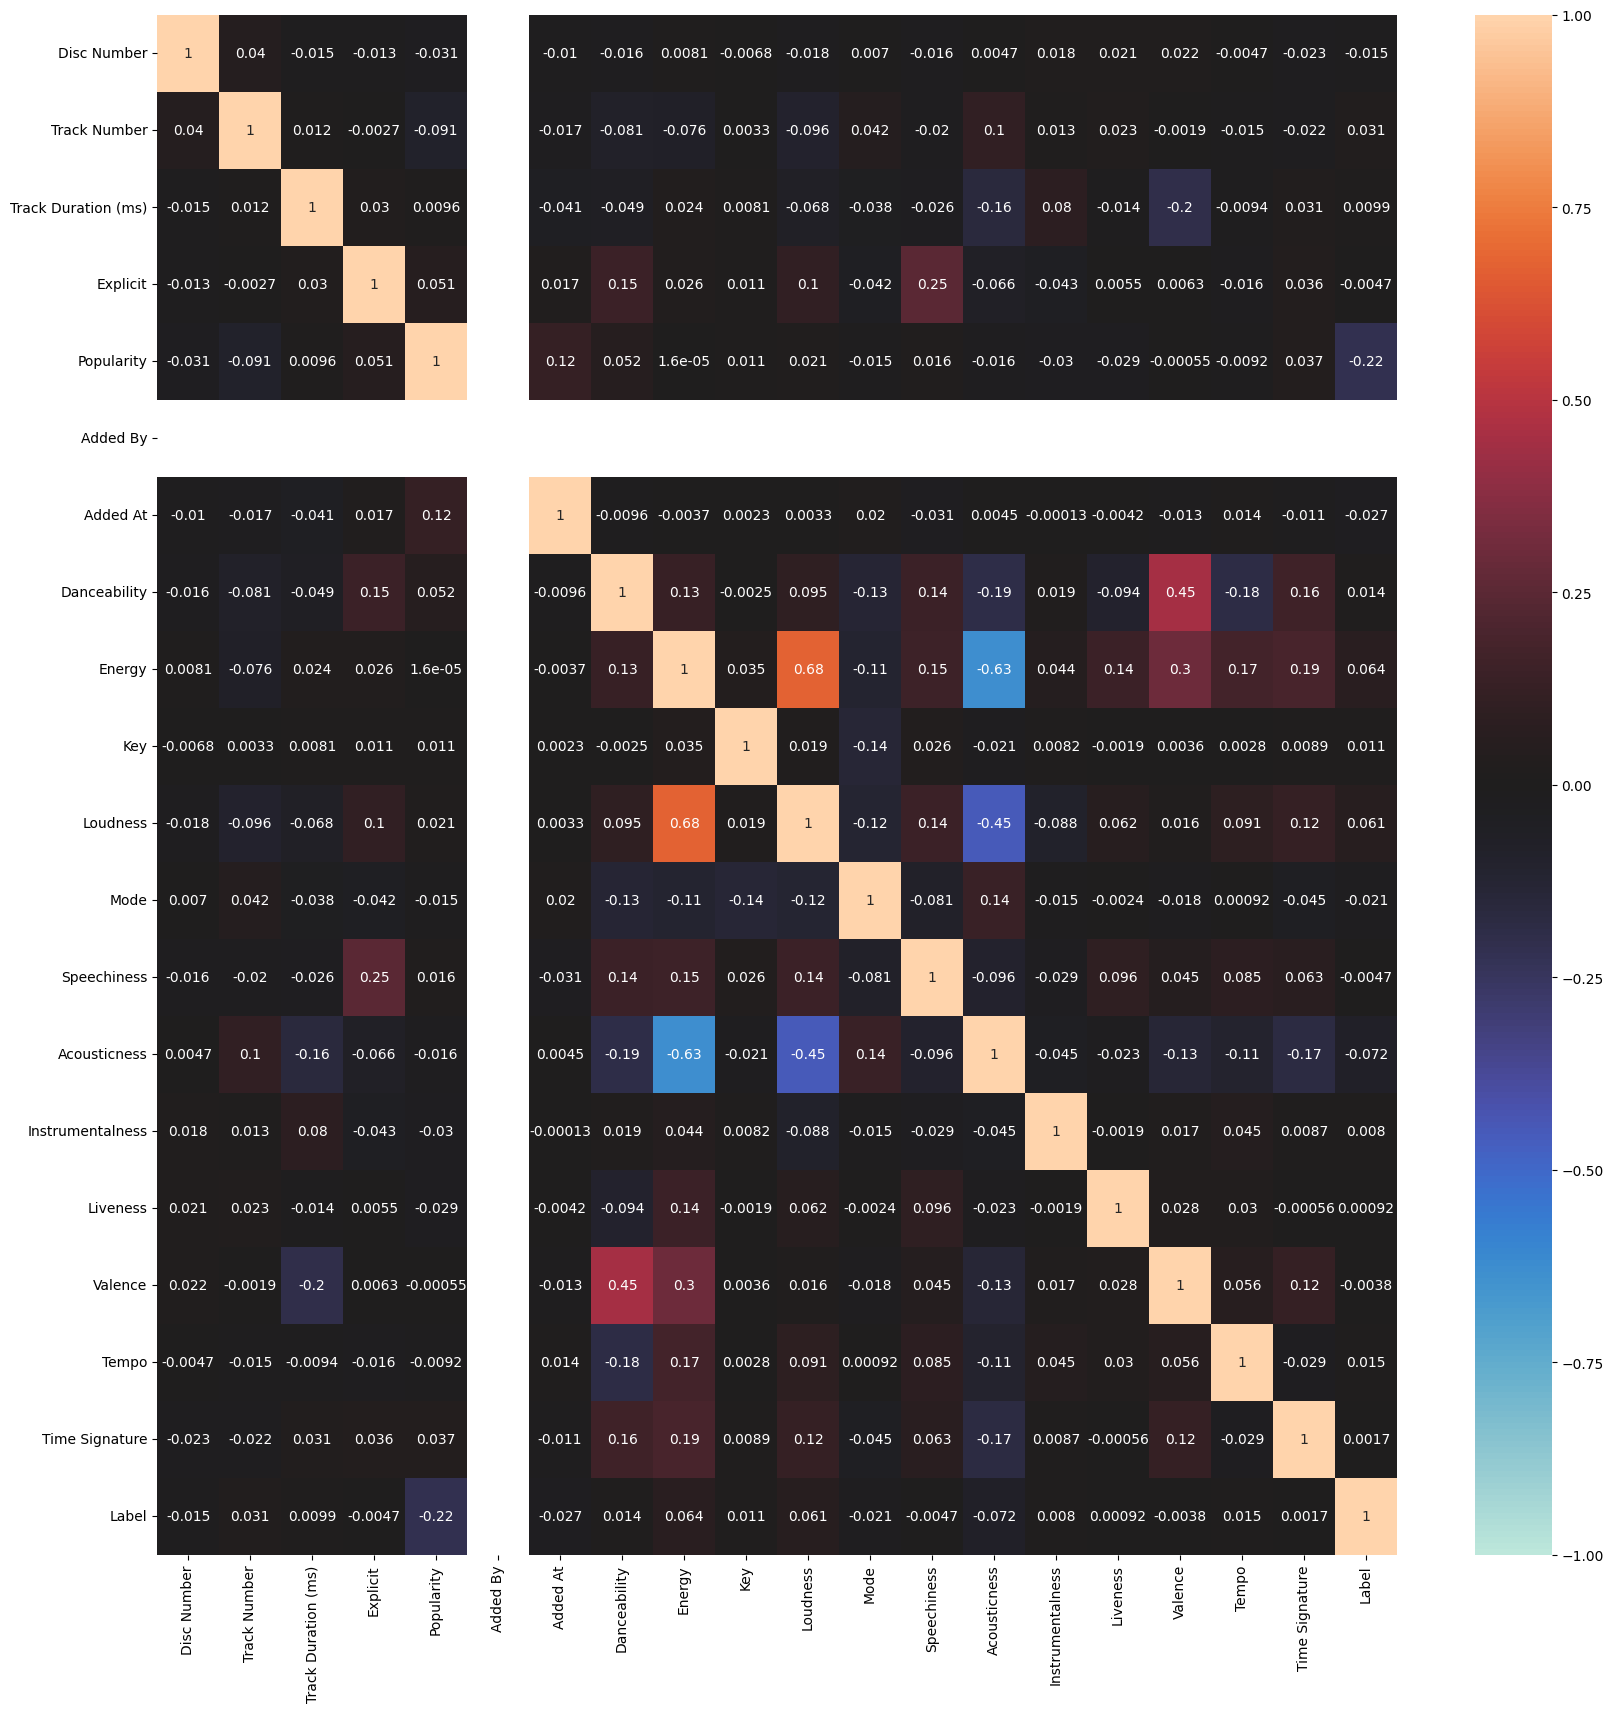

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, fmt=".2g", vmin=-1, vmax=1, center= 0)

<Axes: xlabel='Popularity', ylabel='Count'>

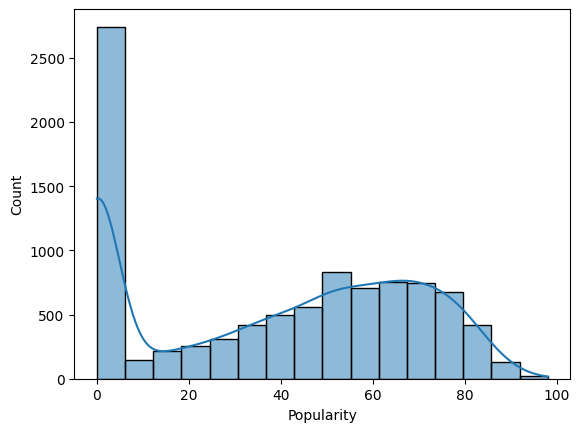

In [ ]:
sns.histplot(df_encoded['Popularity'], kde=True)

<Figure size 3000x3000 with 0 Axes>

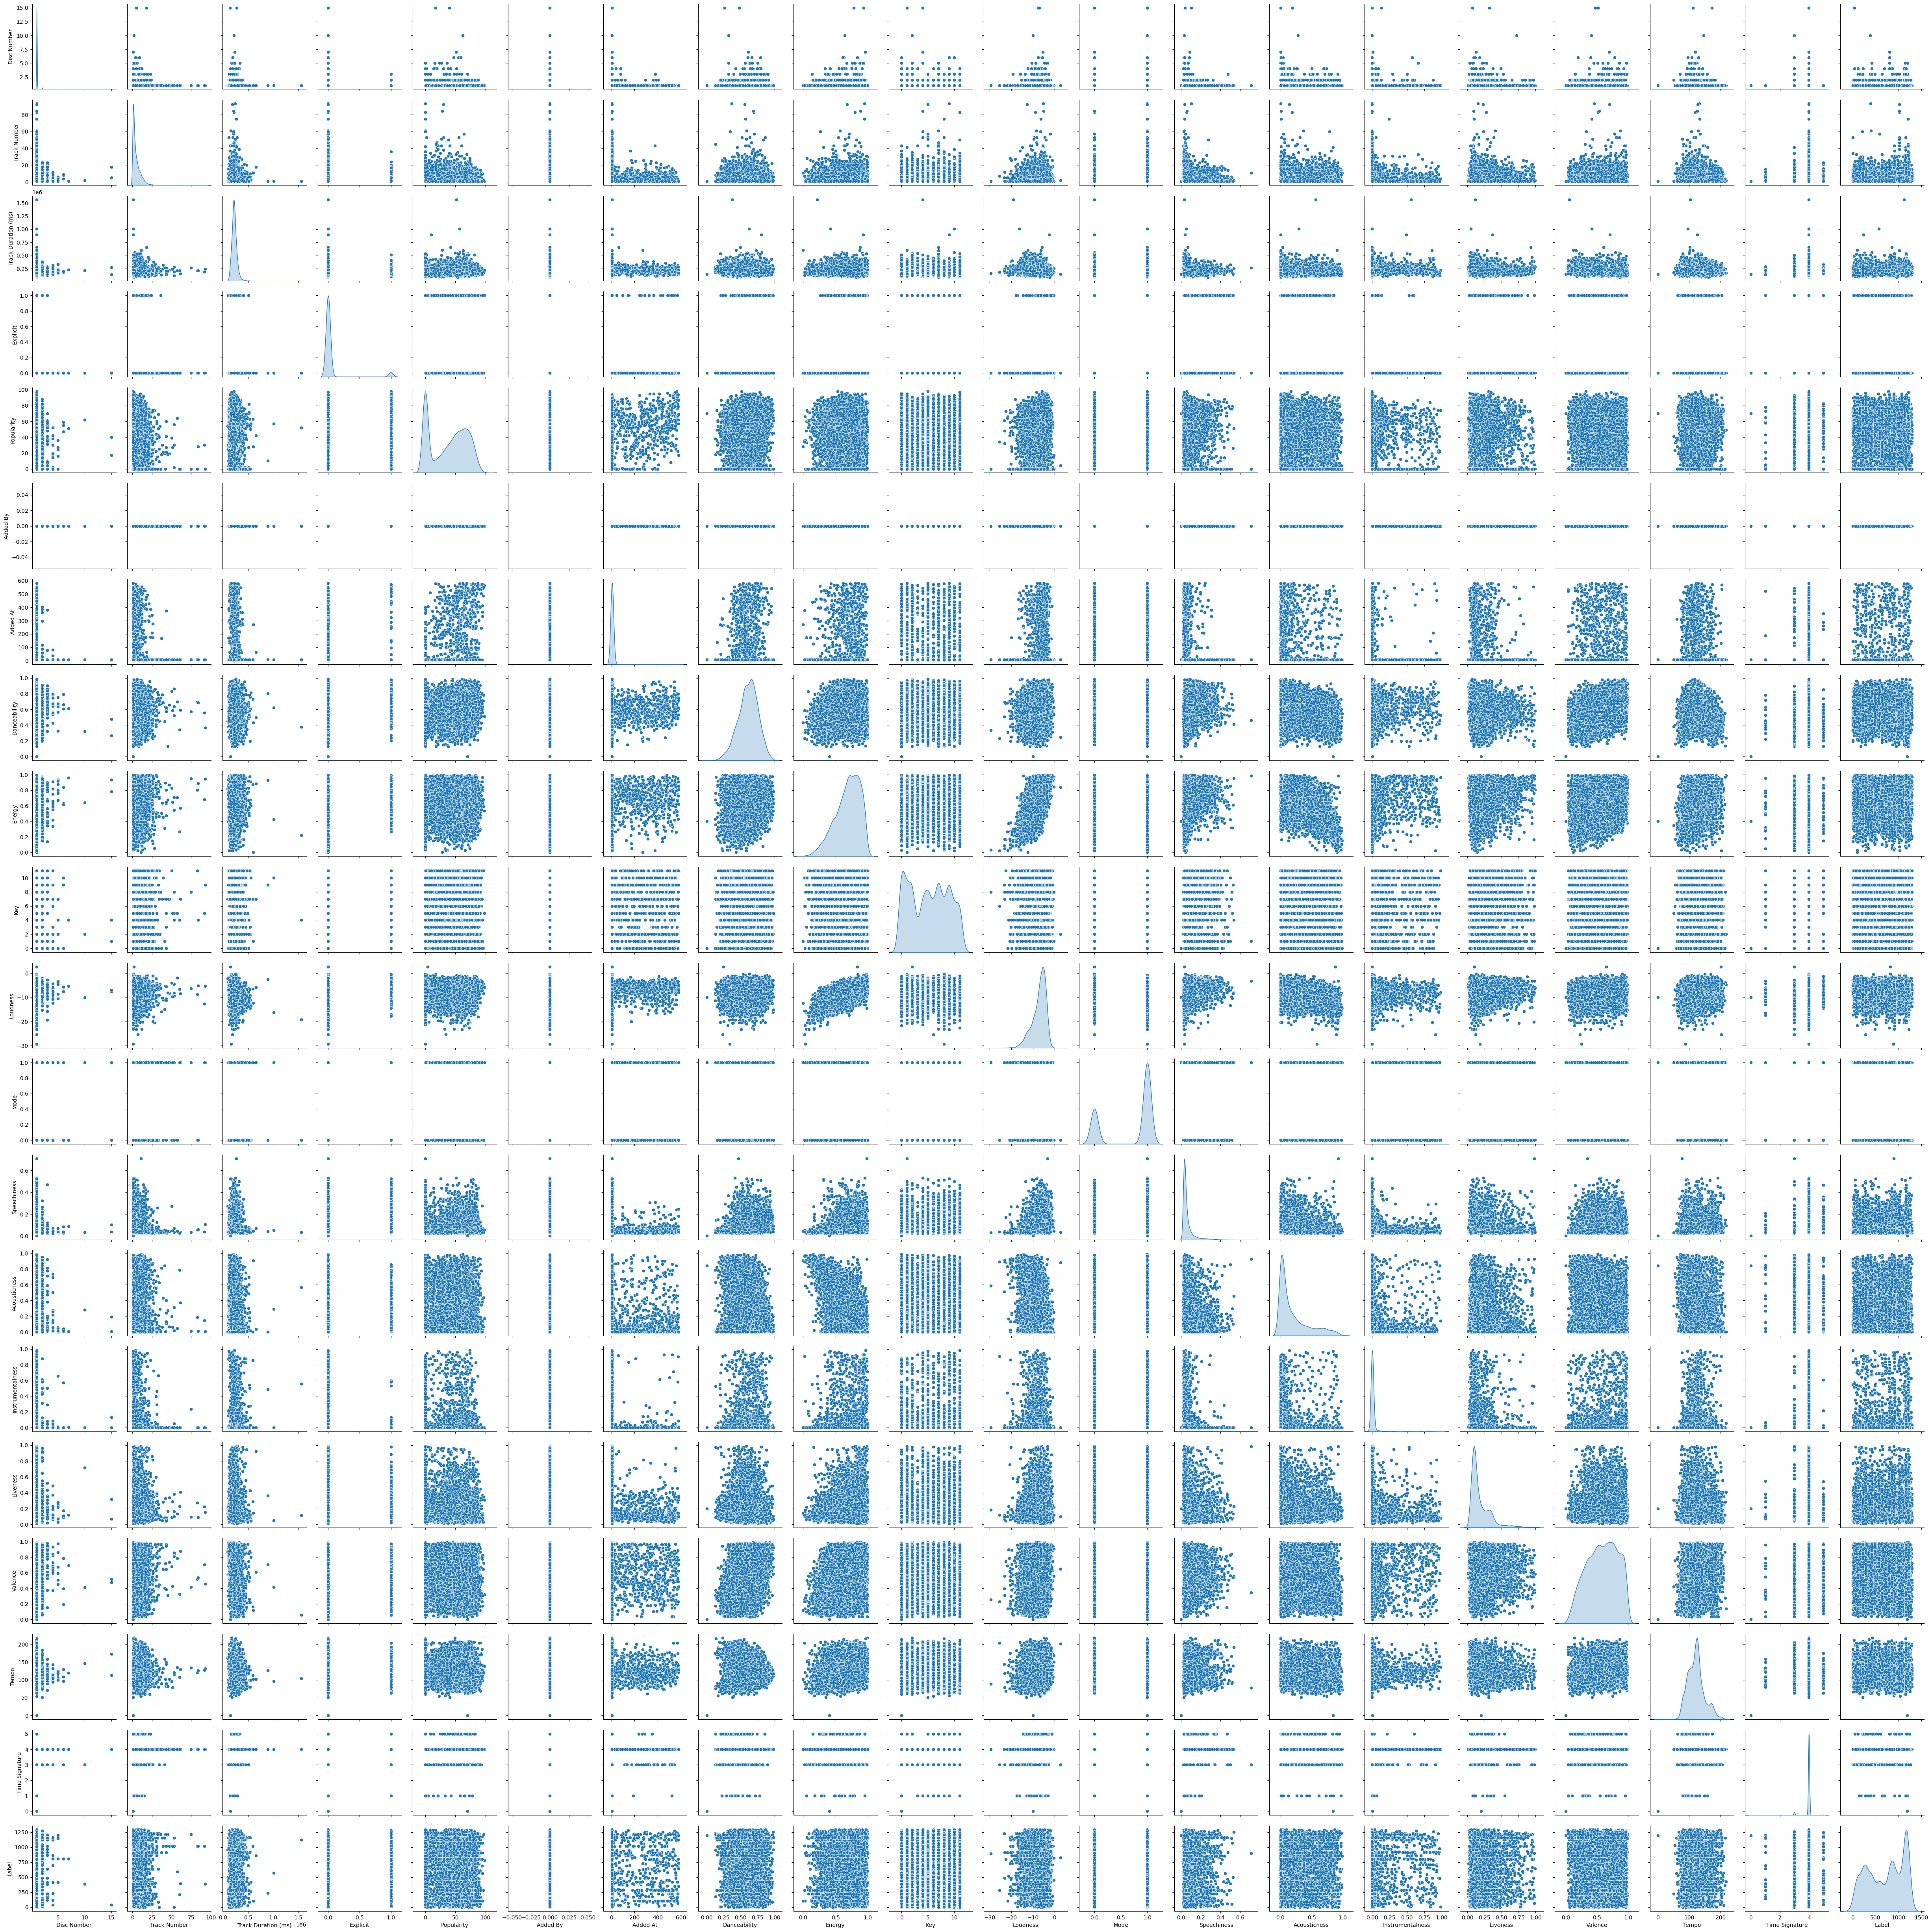

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(df_encoded, diag_kind="kde")

# More Data Preprocessing

## Popolarity Categorize
From the histogram above we see that popularity is widely distributed, therefore, I chose to split it into 5 categories:

0-4 represent 0-20, 21-40, 41-60, 61-80, 81-100 score, and make my model predict on which category the song will fall in.

This turns the regression problem into a classification problem with 5 classes, which should help simplify the modeling and evaluation. Categorizing continuous values is a common technique in machine learning when dealing with sparsely distributed target variables.

## Upsample unbalanced data
To avoid overfitting the data, we should also upsample the minority classes in the popularity categories so the number of songs in each category are approximately the same.

<Axes: xlabel='Popularity', ylabel='Count'>

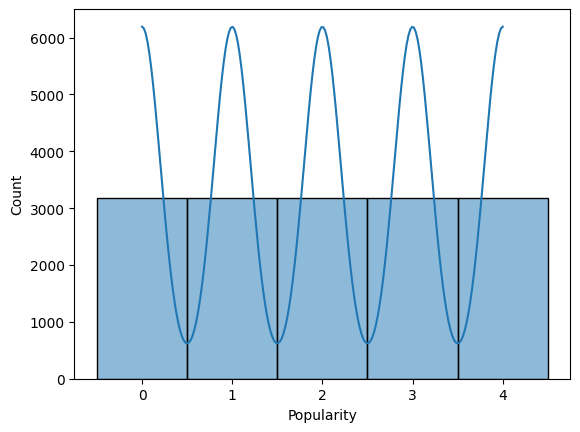

In [ ]:
# Define the bins and their labels
bins = [-1, 20, 40, 60, 80, 100]  # -1 is used to ensure the lower bound includes 0
labels = [0, 1, 2, 3, 4]

df_encoded['Popularity_Category'] = pd.cut(df_encoded['Popularity'], bins=bins, labels=labels)
df_pop_categorized = df_encoded.drop(columns=['Popularity']).rename(columns={'Popularity_Category': 'Popularity'})


# Determine the category with the maximum count
max_count = df_pop_categorized['Popularity'].value_counts().max()
dfs = []

for category in labels:
    df_category = df_pop_categorized[df_pop_categorized['Popularity'] == category]
    df_category_upsampled = resample(df_category,
                                     replace=True,
                                     n_samples=max_count,
                                     random_state=42)  # random_state for reproducibility
    dfs.append(df_category_upsampled)

df_upsampled = pd.concat(dfs, axis=0)
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
sns.histplot(df_upsampled['Popularity'], kde=True)

Now, our data is balanced.

# Model Training

In [ ]:
# Prepare train and test data
X = df_upsampled.drop(columns=['Popularity'])
y = df_upsampled['Popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Classifiers
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

rf_predictions = rf.predict(X_test)
dt_predictions = dt.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

results = pd.DataFrame({
    'Model Name': ['Random Forest', 'Decision Tree'],
    'Accuracy': [rf_accuracy, dt_accuracy]
})

results

Model Name  Accuracy
0  Random Forest  0.826398
1  Decision Tree  0.821564

# Hyperparameter Tunning

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)  # Use all processors

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Final accuracy with best parameters: ", accuracy)

The accuracy is slightly lower than with the default parameters. This is due to us setting cv=5 for 5-fold cross-validation. The accuracy obtained through cross-validation tends to be more reliable.